# INVESTIGATE A DATASET 

# Table of contents
> -  ## Introduction 
> -  ## Questions
> -  ## Data wrangling
> -  ## Data analysis and Observations 
> -  ## Limitations 
> -  ## Conclusion





### Introduction
 
>The dataset I have choosen to investigate here is the imdb movie list that contains various informations about the movies released over the years.  
The investigations conducted here are exploratory and any associations will be tentative at best, as only visualization and basic correlations are attempted in this project. Any relation inferred will be used only as a pointer for conducting further detailed, statistically backed analysis.

### Questions
>-  When the dataset is grouped by directors
>what is the movie count for each director ?<br>
>-  Which directors have the most popularity and revenue ?
>-  How does popularity of a movie in general affect its revenue ? 
>-  What is the budget,revenue and profit gained by the production companies ?
>-  Which production companies have the most popularity and revenue ?
>-  What is the average budget,revenue and profit of the movies released over various years ?
>-  What is the runtime trend over the years ?











### Data wrangling
> Before proceeding with the analysis of our dataset,we have to make sure any missing,repeated or duplicate entries in the given dataset are identified and necessary steps are taken. 


> The necessary packages are imported to make things easier.


In [1]:
#import necessary packages 
import numpy as np
import pandas as pd 
import unicodecsv
import matplotlib.pyplot as plt
%matplotlib inline


 _As mentioned earlier we check for any duplicate and missing entries_

In [2]:
# to parse the csv file 
filename='Downloads/tmdb-movies.csv'
tmdb_csv=pd.read_csv(filename)

# to find any duplicate entries
tmdb_csv.duplicated().sum()

1

we see that there is one duplicated entry. So the duplicated entry is dropped. 

In [3]:
# to remove duplicate entries
tmdb_csv.drop_duplicates(inplace=True)

# to  find any missing values 
tmdb_csv.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

we see that the dataset contains 10 missing values for the imdb_db which is an essential information to identify the movies because it is unique. Therefore we drop the missing values.
Other missing values such as cast,director,etc., are negligible when compared to the whole dataset. Therefore we keep it as such.  

In [4]:
tmdb_csv.dropna(subset=['imdb_id'],inplace=True)

We also see that our dataset contains columns such as 'tagline','overview','homepage' which are of not much use to the analysis. so we drop it.

In [5]:
# to drop the unwanted columns 
tmdb_csv.drop(['tagline','overview','homepage'],axis=1)
tmdb_csv.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

> Other than these changes the dataset is relatively clean and therefore we continue with the analysis

## Data Analysis
> We write  a new csv with the cleaned dataset amd parse it using pandas  

In [6]:
# to write a new csv file with the changes 
tmdb_csv.to_csv('imdb.csv',index=False)

# to parse the new csv
imdb = pd.read_csv('imdb.csv')

> Before we do any analysis regarding 'directors' in the given datset we take note of the collaborative work of two or more directors present along with the work of individual directors. 
> It should be noted that the analyiss assume the collective preferences when directors colloborate. 

###### To answer our  questions regarding the directors

In [7]:
# to see the value count of directors
imdb['director'].value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Wes Craven           19
Name: director, dtype: int64

This is the top ten list of directors with most number of movies over the years 

-  Now we analysis the vote average 

In [8]:
dir_df = imdb.groupby('director')
dir_df['vote_average'].sum().sort_values(ascending=False)[:10]

director
Woody Allen          290.0
Clint Eastwood       221.3
Martin Scorsese      201.8
Steven Spielberg     197.9
Ridley Scott         149.0
Ron Howard           140.3
Steven Soderbergh    135.8
Brian De Palma       127.1
Tim Burton           126.2
Joel Schumacher      125.4
Name: vote_average, dtype: float64

Though we get a top ten list the vote count for each movie varies.<br>


Therefore we consider popularity and compare the revenue vs populairty for directors.

In [9]:
dir_df['popularity','revenue'].mean().sort_values(by=['popularity','revenue'], ascending=False)[:10]

,popularity,revenue
director,,
Colin Trevorrow,16.696886,7.587683e+08
Joe Russo|Anthony Russo,12.971027,7.147666e+08
Chad Stahelski|David Leitch,11.422751,7.873990e+07
Don Hall|Chris Williams,8.691294,6.521054e+08
Juno John Lee,8.411577,0.000000e+00
Kyle Balda|Pierre Coffin,7.404165,1.156731e+09
Alan Taylor,6.883129,4.601843e+08
Peter Richardson,6.668990,0.000000e+00
Pete Docter,6.326804,8.537086e+08


-  This gives us a top ten list of mean populrity and revenue for the directors.

> ###### Now we try to do the same for the whole dataset and plot it accordingly and see the trend.

Text(0.5,1,'popularity Vs Revenue for directors')

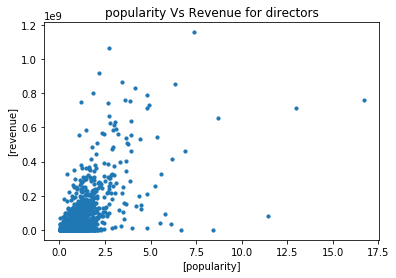

In [10]:
dir_df['popularity','revenue'].mean().plot.scatter(x=['popularity'],y=['revenue'],s=10)
plt.title('popularity Vs Revenue for directors')

#### Observations
-  The plot is positively correlated but it is not significant because we can see the director's movies with average popularity gaining significant revenues when compared with movies with high popularity rate.


> **So to make things clear we carry out the same procedure to analyse popularity vs revenue in general ( not based on directors) and getting to know the distribution of popularity and revenue individually will also be helpful** 

Text(0,0.5,'Movie count')

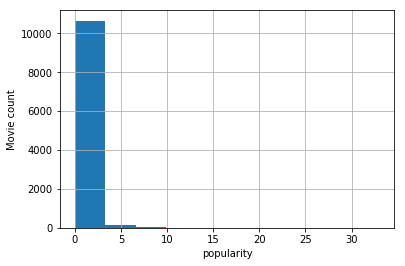

In [11]:
imdb['popularity'].hist()
plt.xlabel('popularity')
plt.ylabel('Movie count')

Text(0,0.5,'movie count')

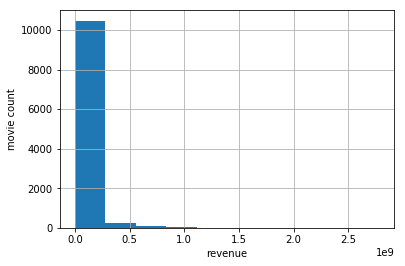

In [12]:
imdb['revenue'].hist()
plt.xlabel('revenue')
plt.ylabel('movie count')

Text(0,0.5,'Revenue')

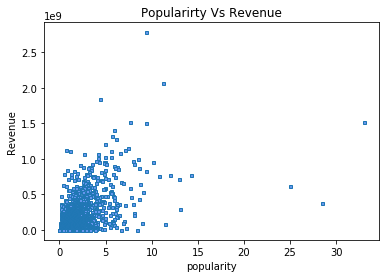

In [13]:
# here we try to gropu movies based on thier popularity and try to analyse the revenue trend 
popular_df=imdb.groupby('popularity')
popVsrev=popular_df['revenue'].mean().sort_values(ascending=False)
# to plot our finding 
popVsrev.plot(linestyle='none', marker='s', 
        markerfacecolor='cornflowerblue', 
        markersize=3)
plt.title('Popularirty Vs Revenue')
plt.ylabel('Revenue')




##### Observations
-  Now we see that popularity and revenue are positively correlated 
-  For lower values it is much significant 
-  However this purely a correlation and not to be inferred as casuation 

#### To answer our questions regarding the production companies 


> It should be noted that like the 'directors' column, 'production_companies' column have collaborative works too and the same  assumption mentioned above is used here as well.

Here we try to find the top ten production companies that had spent more money as budget for thier films and represent it as a pie chart

Text(0.5,1,'Budget of production companies')

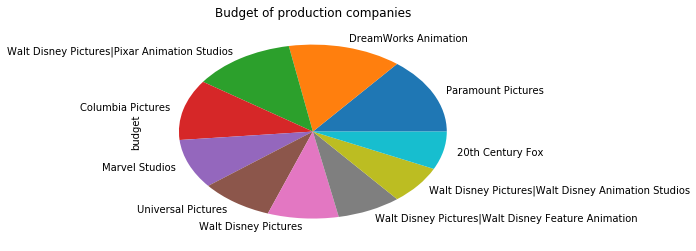

In [14]:
# to group the dataframe by production companies and calculate the sum of budget for each company
p_df=imdb.groupby('production_companies')
company_budget=p_df['budget'].sum()
# to plot our findings  
company_budget.nlargest(10).plot.pie()
plt.title('Budget of production companies')

We do the same to calculate the revenue earned by the production companies 

Text(0.5,1,'Revenue of production companies')

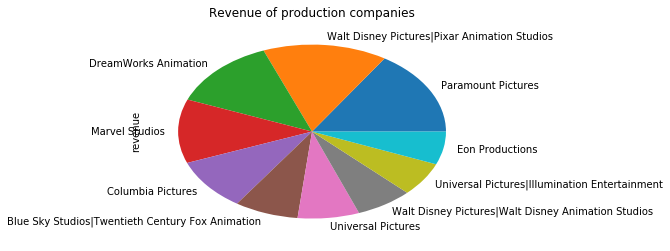

In [15]:
# to calculate the sum of revenue earned by production companies
company_revenue=p_df['revenue'].sum()
# to plot our finding 
company_revenue.nlargest(10).plot.pie()
plt.title('Revenue of production companies')

We try to calculate top ten production companies with the most gross profit earned.

Text(0,0.5,'Profit')

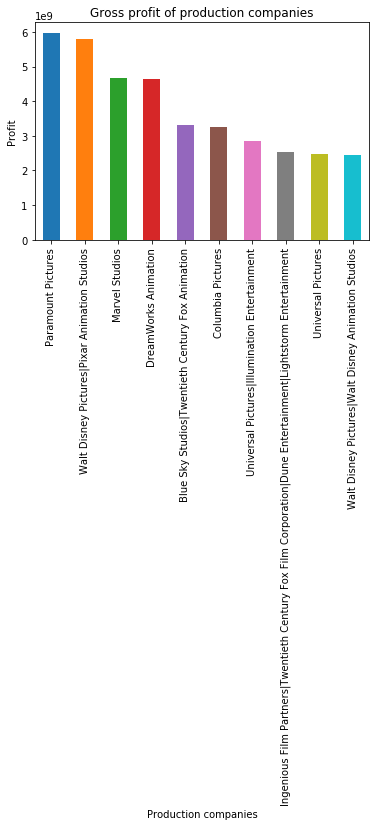

In [16]:
# to calculate the profit of each company
diff=company_revenue-company_budget
# to plot the ten companies with largest profit
diff.nlargest(10).plot.bar()
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Gross profit of production companies')
plt.xlabel('Production companies')
plt.ylabel('Profit')

##### Observations 
-  When considering the budget , revenue and profit gained we can see that the Walt Disney Pictures have individually and collaboratively played a dominant role among the other production companies present in the list.  

> Now to try to analyse Popularity and  Revenue for the production companies in the dataset.

In [17]:
p_df['popularity','revenue'].sum().sort_values(by=['popularity','revenue'],ascending=False)[:10]

,popularity,revenue
production_companies,,
Paramount Pictures,96.287548,8097344275
Universal Pictures,66.184716,3792411919
Marvel Studios,61.146608,6047908966
Walt Disney Pictures,60.457619,3077561290
Columbia Pictures,45.666309,4925479137
Walt Disney Pictures|Pixar Animation Studios,45.073337,7648558520
Warner Bros.,43.782352,2537558369
New Line Cinema,39.400324,2386329840
Metro-Goldwyn-Mayer (MGM),36.062615,1130564548


We see here a top ten list of production companies with most popularity and their respective revenue.

##### To analyse various trends over different years 
> We try to find the average budget of movies released each year 

In [18]:
# to group data by release year 
year_df=imdb.groupby('release_year')
# to find the average budget for each year
yearly_budget=year_df['budget'].mean()
yearly_budget

release_year
1960    6.892796e+05
1961    1.488290e+06
1962    1.710066e+06
1963    2.156809e+06
1964    9.400753e+05
1965    2.005860e+06
1966    1.251191e+06
1967    2.516305e+06
1968    1.844590e+06
1969    1.359003e+06
1970    3.096755e+06
1971    1.381764e+06
1972    9.069813e+05
1973    1.185287e+06
1974    1.637660e+06
1975    1.279068e+06
1976    2.598936e+06
1977    2.834737e+06
1978    3.215339e+06
1979    4.470421e+06
1980    4.647436e+06
1981    4.558022e+06
1982    5.404877e+06
1983    6.488843e+06
1984    6.944876e+06
1985    6.868997e+06
1986    5.822592e+06
1987    5.675646e+06
1988    6.381710e+06
1989    7.880703e+06
1990    9.772137e+06
1991    1.102431e+07
1992    1.084034e+07
1993    9.997914e+06
1994    1.211526e+07
1995    1.637648e+07
1996    1.807374e+07
1997    2.474524e+07
1998    2.142695e+07
1999    2.573766e+07
2000    2.534229e+07
2001    2.331382e+07
2002    2.216030e+07
2003    2.220590e+07
2004    2.335616e+07
2005    2.017386e+07
2006    1.790732e+07


Text(0.5,1,'Budget over the years')

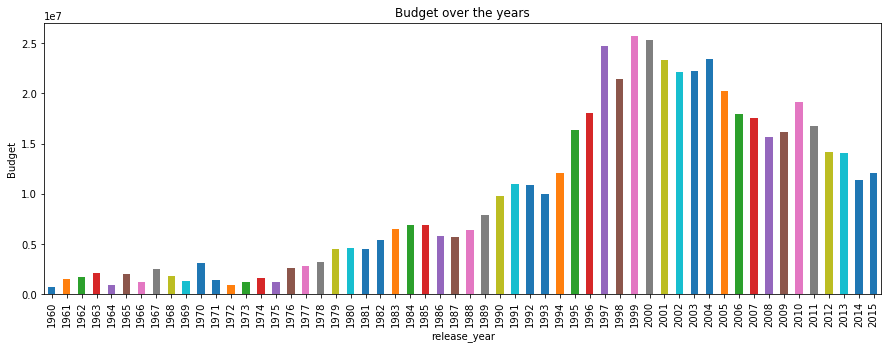

In [19]:
# to plot the finding
yearly_budget.plot.bar(x='release year',y='budget')
plt.ylabel('Budget')
plt.title('Budget over the years')




The process is now carried out to find the yearly average revenue for release years

In [20]:
# the same is done for revenue 
# to calculate average revenue for each year 
yearly_revenue=year_df['revenue'].mean()
yearly_revenue

release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.844587e+07
1968    6.788025e+06
1969    7.869583e+06
1970    1.366395e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.728808e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.825584e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.510023e+07
1985    2.638323e+07
1986    2.481635e+07
1987    2.769684e+07
1988    2.579001e+07
1989    3.770017e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.570040e+07
1993    3.907388e+07
1994    3.856212e+07
1995    5.232195e+07
1996    4.074261e+07
1997    5.549569e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.836432e+07
2001    5.541357e+07
2002    5.505120e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.537592e+07
2006    3.989152e+07


Text(0.5,1,'Revenue over the years')

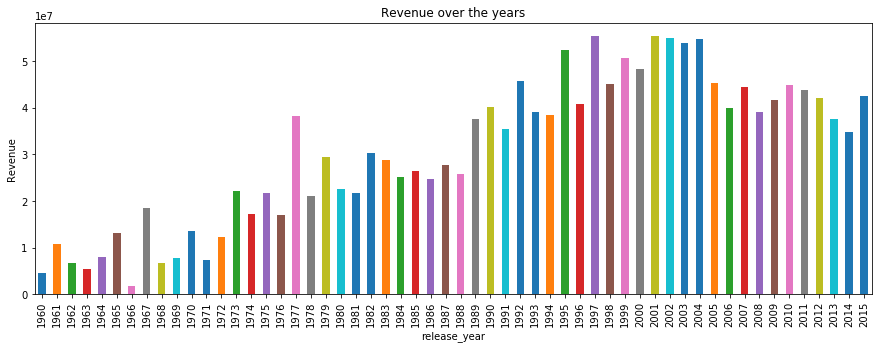

In [21]:
# to plot our finding 
yearly_revenue.plot.bar()
plt.ylabel('Revenue')
plt.title('Revenue over the years')

Now we calculate the difference between yearly average revenue and yearly average budget 

In [22]:
# to calculate the difference 
difference = yearly_revenue-yearly_budget
difference

release_year
1960    3.842127e+06
1961    9.405909e+06
1962    5.026804e+06
1963    3.355103e+06
1964    7.178539e+06
1965    1.108219e+07
1966    5.909106e+05
1967    1.592956e+07
1968    4.943435e+06
1969    6.510580e+06
1970    1.056720e+07
1971    5.980247e+06
1972    1.146127e+07
1973    2.106891e+07
1974    1.565042e+07
1975    2.048207e+07
1976    1.444374e+07
1977    3.542111e+07
1978    1.785819e+07
1979    2.508738e+07
1980    1.802772e+07
1981    1.708352e+07
1982    2.494628e+07
1983    2.235527e+07
1984    1.815536e+07
1985    1.951424e+07
1986    1.899376e+07
1987    2.202119e+07
1988    1.940830e+07
1989    2.981947e+07
1990    3.049428e+07
1991    2.436366e+07
1992    3.486006e+07
1993    2.907597e+07
1994    2.644686e+07
1995    3.594547e+07
1996    2.266887e+07
1997    3.075045e+07
1998    2.377864e+07
1999    2.495749e+07
2000    2.302203e+07
2001    3.209975e+07
2002    3.289090e+07
2003    3.166685e+07
2004    3.134685e+07
2005    2.520206e+07
2006    2.198420e+07


Text(0.5,1,'Profit over the years')

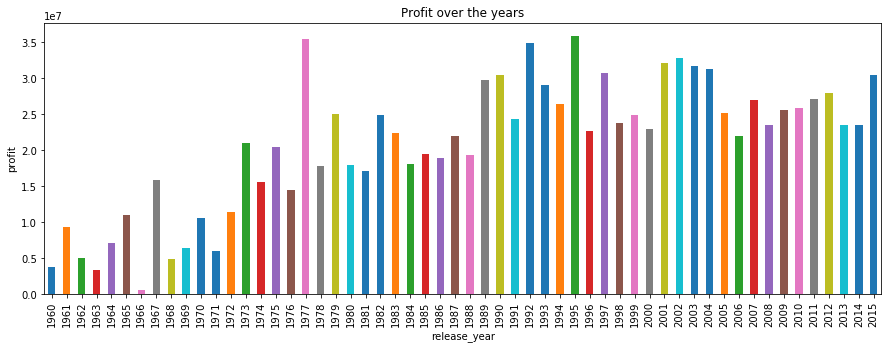

In [23]:
# to plot our finding 
difference.plot.bar()
plt.ylabel('profit')
plt.title('Profit over the years')

To have an overview of the movie industry we try to see the total number of movies released every year.

Text(0.5,1,'Releases per year')

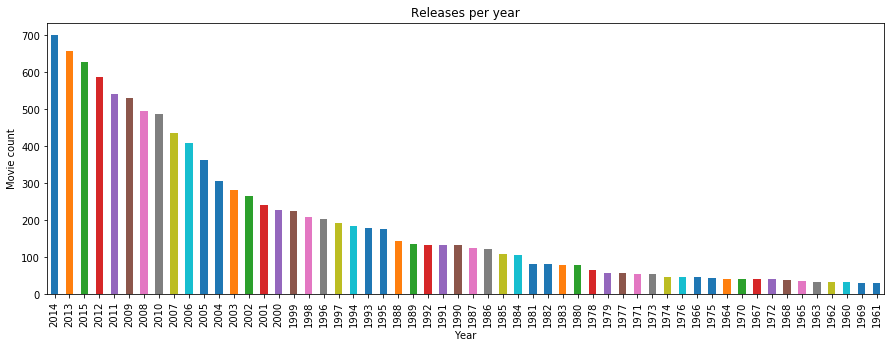

In [24]:
# to know the movie count 
imdb['release_year'].value_counts().plot.bar()
plt.xlabel('Year')
plt.ylabel('Movie count')
plt.title('Releases per year')

##### Observation 
-  we can see the number of movies released each year has increased gradually and number of movies released in the year 2015 is more than 600. 


**To analyse the runtime trend over the years** 

Text(0.5,1,'Runtime over the years ')

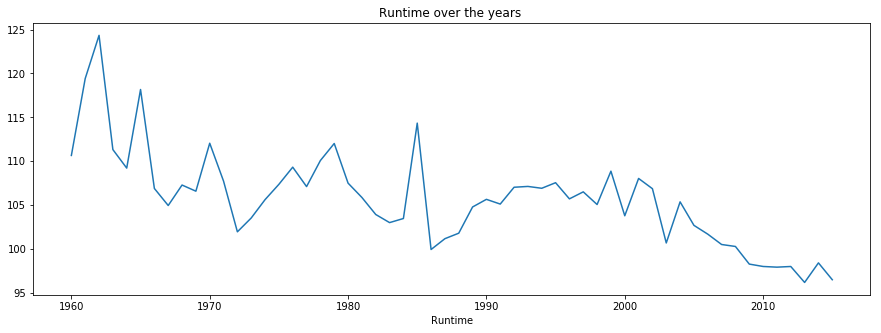

In [25]:
# to calculate mean runtime for each year and to plot the findings 
year_df['runtime'].mean().plot.line()
plt.xlabel('Runtime')
plt.title('Runtime over the years ')

##### Observations
-  The average runtime over the years have decreased recently and for the recent years it is just above 95 mins


### Limitations
-  In the above analysis, we have worked with runtimes, popularity , revenues , directors, production companies and release years
-  Dataset is not exhaustive and hence, results or inferences are not absolute. i.e The dataset does not confirm that every release of every director is listed. Findings are limited to datset only.
-  We restrict ourselves to only numerical values of revenues. Any variances in currencies, like dollars, rupees, Euros, etc. are not considered.
-  Vote counts are taken at face value. We are not inspecting the nature of votes, good or bad or any other range of values. Also, the period or channels in which these vote counts were gathered is not considered and will be significant if varying for different movies.
-  The medium through which popularity was determined is unknown. This can impact the analysis as the limitations and bias, inherent while gauging audience response, will be present in the end values too.
-  This analysis assumes that the same index and methods were employed for collecting popularity factors and counting votes for all movies. In the event that it is not so, the results might not hold true. [a possibility since movies are from different countries and languages]
-  We are also considering body of work for every directors individual work. Collaborations are considered separate and only for unique set of directors. As stated at the beginnig, this analysis assumes collective preferences when directors work together.
-  While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.



### Conclusion
-  From our Data analysis we found the director with most film count and the most successful directors based on popularity and revenue.
-  We also found the most successful production companies over the years and thier respective budget,revenue and profit 
-  The number of movies released each year increased gradually and for the year 2015 it was over 600
-  The avearge runtime has decreased significantly and in the recent years it was around 96 minutes. 
-  However the analysis is tentative and any relation inferred can be used only as a pointer for conducting further detailed, statistically backed analysis.

In [26]:
from subprocess import call
call (['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295